<a href="https://colab.research.google.com/github/ClovisMallmann/XP_Projeto_Aplicado/blob/main/2_Gestao_Algoritmos_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carregamendo do Google drive para leitura dos Datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importando bibliotecas

import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1 - Importando a Base de dados e tratando, caso precise.

In [ ]:
Dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/Base_dados_gestao.csv', sep=';', encoding='utf8')

In [ ]:
Dados.head()

,Remedios,Cliente_id,Nome,idade,sexo,Uf,Escolaridade,Renda,Civil,Sintomas,Data
0,Amoxicilina;,1,Lars Maynard,78,Feminino,MA,Medio,6050,Casado,Incontinencia_urinaria,2022-05-08
1,Amoxicilina; Escitalopram; Azitromicina;,2,Zane Mullen,70,Feminino,RS,Primario,6866,Viuvo,Insonia,2021-09-19
2,Amoxicilina;,4,Ignacia Pugh,73,Masculino,MA,Superior,4567,Casado,Normal,2022-10-19
3,Amoxicilina;,4,Ignacia Pugh,73,Masculino,MA,Superior,4567,Casado,Vomito,2021-12-02
4,Amoxicilina;,4,Ignacia Pugh,73,Masculino,MA,Superior,4567,Casado,Lapsos_de_memoria,2022-05-16


In [ ]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Remedios      80 non-null     object
 1   Cliente_id    80 non-null     int64 
 2   Nome          80 non-null     object
 3   idade         80 non-null     int64 
 4   sexo          80 non-null     object
 5   Uf            80 non-null     object
 6   Escolaridade  80 non-null     object
 7   Renda         80 non-null     int64 
 8   Civil         80 non-null     object
 9   Sintomas      80 non-null     object
 10  Data          80 non-null     object
dtypes: int64(3), object(8)
memory usage: 7.0+ KB


In [ ]:
#Convertendo o dataframe de forma automática para os Dtypes adequados!

Dados = Dados.convert_dtypes()

In [ ]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Remedios      80 non-null     string
 1   Cliente_id    80 non-null     Int64 
 2   Nome          80 non-null     string
 3   idade         80 non-null     Int64 
 4   sexo          80 non-null     string
 5   Uf            80 non-null     string
 6   Escolaridade  80 non-null     string
 7   Renda         80 non-null     Int64 
 8   Civil         80 non-null     string
 9   Sintomas      80 non-null     string
 10  Data          80 non-null     string
dtypes: Int64(3), string(8)
memory usage: 7.2 KB


In [ ]:
#Trando a coluna Data

Dados['Data'] = pd.to_datetime(Dados['Data'])

In [ ]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Remedios      80 non-null     string        
 1   Cliente_id    80 non-null     Int64         
 2   Nome          80 non-null     string        
 3   idade         80 non-null     Int64         
 4   sexo          80 non-null     string        
 5   Uf            80 non-null     string        
 6   Escolaridade  80 non-null     string        
 7   Renda         80 non-null     Int64         
 8   Civil         80 non-null     string        
 9   Sintomas      80 non-null     string        
 10  Data          80 non-null     datetime64[ns]
dtypes: Int64(3), datetime64[ns](1), string(7)
memory usage: 7.2 KB


## **2 - Prontificação a base de dados para estudos**

In [ ]:
Dados.head(20)

,Remedios,Cliente_id,Nome,idade,sexo,Uf,Escolaridade,Renda,Civil,Sintomas,Data
0,Amoxicilina;,1,Lars Maynard,78,Feminino,MA,Medio,6050,Casado,Incontinencia_urinaria,2022-05-08
1,Amoxicilina; Escitalopram; Azitromicina;,2,Zane Mullen,70,Feminino,RS,Primario,6866,Viuvo,Insonia,2021-09-19
2,Amoxicilina;,4,Ignacia Pugh,73,Masculino,MA,Superior,4567,Casado,Normal,2022-10-19
3,Amoxicilina;,4,Ignacia Pugh,73,Masculino,MA,Superior,4567,Casado,Vomito,2021-12-02
4,Amoxicilina;,4,Ignacia Pugh,73,Masculino,MA,Superior,4567,Casado,Lapsos_de_memoria,2022-05-16
5,Amoxicilina; Escitalopram; Azitromicina; Cefal...,8,Kylee Leonard,70,Masculino,MG,Superior,5854,Casado,Agressividade,2021-04-28
6,Amoxicilina; Escitalopram; Azitromicina; Cefal...,8,Kylee Leonard,70,Masculino,MG,Superior,5854,Casado,Agressividade,2022-11-15
7,Amoxicilina; Escitalopram; Azitromicina;,10,Samuel Petty,97,Feminino,RJ,Primario,5688,Casado,Normal,2022-07-10
8,Amoxicilina; Escitalopram; Azitromicina;,10,Samuel Petty,97,Feminino,RJ,Primario,5688,Casado,Vomito,2020-10-31
9,Amoxicilina; Escitalopram; Azitromicina;,12,Dolan Avery,94,Masculino,SC,Medio,6071,Solteiro,Incontinencia_urinaria,2020-10-29


## **3 - Correlação**

## **3.1 - Preparação**

In [ ]:
#Classificando os dados das colunas sexo, UF, Escolaridade, Civil, Sintomas

sexo_class = {'Masculino':'1','Feminino':'2'}

uf_class = {'RO':'1','AC':'2','AM':'3','RR':'4','PA':'5','AP':'6','TO':'7','MA':'8','PI':'9','CE':'10','RN':'11',
            'PB':'12','PE':'13','AL':'14','SE':'15','BA':'16','MG':'17','ES':'18','RJ':'19','SP':'20',
            'PR':'21','SC':'22','RS':'23','MS':'24','MT':'25','GO':'26','DF':'27'
            }


Escolaridade_class = {'Primario':1,'Medio':2,'Superior':3}

Civil_class = {'Solteiro':1,'Casado':2,'Viuvo':3,'Separado':4}

Sintomas_class = {'Normal':1,'Insonia':2,'Agressividade':3,'Quedas_de_pressao':4,'Lapsos_de_memoria':5,'Incontinencia_urinaria':6,'Vomito':7}


In [ ]:
#Alterando os dados das colunas

Dados['sexo'] = Dados['sexo'].map(sexo_class)
Dados['Uf'] = Dados['Uf'].map(uf_class)
Dados['Escolaridade'] = Dados['Escolaridade'].map(Escolaridade_class)
Dados['Civil'] = Dados['Civil'].map(Civil_class)
Dados['Sintomas'] = Dados['Sintomas'].map(Sintomas_class)
Dados.head(10)

In [ ]:
#Verificando os tipos de dados das colunas
Dados.info()

In [ ]:
#Convertendo as colunas sexo e Uf para os formatos adequados adequados!

Dados['sexo'] = pd.to_numeric(Dados['sexo'])
Dados['Uf'] = pd.to_numeric(Dados['Uf'])


In [ ]:
Dados.info()

In [ ]:
Dados.head(10)

In [ ]:
#necessidade de criar uma coluna com a quantidade de remédios por cliente
lista = Dados['Remedios'].unique()

In [ ]:
#Cada cliente possui seus remedios e esta informação alimentará uma nova
#coluna com a quantidade dos mesmos para analises posteriores...

r1 = lista[0]
r2 = lista[4]
r3 = lista[1]
r4 = lista[2]
r5 = lista[3]


In [ ]:
Dados['Qtde'] = Dados['Remedios'].apply(lambda x:'1' if x == r1 else '2' if x == r2 else '3' if x == r3 else '4' if x == r4 else '5' )

In [ ]:
Dados.head(20)

,Remedios,Cliente_id,Nome,idade,sexo,Uf,Escolaridade,Renda,Civil,Sintomas,Data,Qtde
0,Amoxicilina;,1,Lars Maynard,78,2,8,2,2754,2,3,2022-05-08,1
1,Amoxicilina; Escitalopram; Azitromicina;,2,Zane Mullen,70,2,23,1,2754,3,3,2021-09-19,3
2,Amoxicilina;,4,Ignacia Pugh,73,1,8,3,2754,2,3,2022-10-19,1
3,Amoxicilina;,4,Ignacia Pugh,73,1,8,3,2754,2,3,2021-12-02,1
4,Amoxicilina;,4,Ignacia Pugh,73,1,8,3,2754,2,3,2022-05-16,1
5,Amoxicilina; Escitalopram; Azitromicina; Cefal...,8,Kylee Leonard,70,1,17,3,2754,2,5,2021-04-28,4
6,Amoxicilina; Escitalopram; Azitromicina; Cefal...,8,Kylee Leonard,70,1,17,3,2754,2,5,2022-11-15,4
7,Amoxicilina; Escitalopram; Azitromicina;,10,Samuel Petty,97,2,19,1,2754,2,3,2022-07-10,3
8,Amoxicilina; Escitalopram; Azitromicina;,10,Samuel Petty,97,2,19,1,2754,2,3,2020-10-31,3
9,Amoxicilina; Escitalopram; Azitromicina;,12,Dolan Avery,94,1,22,2,2754,1,3,2020-10-29,3


# **3.2 - Manipulação de Dados**

In [ ]:
#Manipulação 1
#Manipulando os dados com a intenção de obter correlação mais amigável e gerar insights
#A ideia é quanto maior o numero de remedios (coluna Qtde) maior o numero de sintomas.
import random

Dados['Sintomas'] = Dados['Qtde'].apply(lambda x:random.randint(1,3) if x <=3 else random.randint(4,5) if x>=4 and x<=5 else random.randint(5,7)  )

In [ ]:
#Manipulação 2
#A ideia é quanto maior o numero de Sintomas menor a renda.

Dados['Renda'] = Dados['Sintomas'].apply(lambda x: random.randint(1320,2500) if x >= 5 else random.randint(2600,3900) if x<5 and x > 3 else random.randint(4000,6000))

In [ ]:
Dados.head(20)

,Remedios,Cliente_id,Nome,idade,sexo,Uf,Escolaridade,Renda,Civil,Sintomas,Data,Qtde
0,Amoxicilina;,1,Lars Maynard,78,2,8,2,4551,2,2,2022-05-08,1
1,Amoxicilina; Escitalopram; Azitromicina;,2,Zane Mullen,70,2,23,1,4013,3,1,2021-09-19,3
2,Amoxicilina;,4,Ignacia Pugh,73,1,8,3,4334,2,3,2022-10-19,1
3,Amoxicilina;,4,Ignacia Pugh,73,1,8,3,4860,2,1,2021-12-02,1
4,Amoxicilina;,4,Ignacia Pugh,73,1,8,3,5418,2,2,2022-05-16,1
5,Amoxicilina; Escitalopram; Azitromicina; Cefal...,8,Kylee Leonard,70,1,17,3,2802,2,4,2021-04-28,4
6,Amoxicilina; Escitalopram; Azitromicina; Cefal...,8,Kylee Leonard,70,1,17,3,3761,2,4,2022-11-15,4
7,Amoxicilina; Escitalopram; Azitromicina;,10,Samuel Petty,97,2,19,1,5743,2,2,2022-07-10,3
8,Amoxicilina; Escitalopram; Azitromicina;,10,Samuel Petty,97,2,19,1,5689,2,2,2020-10-31,3
9,Amoxicilina; Escitalopram; Azitromicina;,12,Dolan Avery,94,1,22,2,4519,1,1,2020-10-29,3


In [ ]:
Dados.describe()

,Cliente_id,idade,sexo,Uf,Escolaridade,Renda,Civil,Sintomas,Qtde
count,80.0,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,43.675,81.0,1.562500,14.062500,2.412500,4169.100000,2.237500,2.650000,2.750000
std,22.419914,9.91355,0.499208,6.230476,0.790669,1270.786964,1.093638,1.415108,1.247783
min,1.0,65.0,1.000000,5.000000,1.000000,1419.000000,1.000000,1.000000,1.000000
25%,26.75,73.0,1.000000,8.000000,2.000000,3140.750000,1.000000,1.000000,2.000000
50%,46.5,80.0,2.000000,13.000000,3.000000,4392.500000,2.000000,2.000000,3.000000
75%,61.25,89.25,2.000000,19.250000,3.000000,5255.750000,3.000000,4.000000,4.000000
max,80.0,97.0,2.000000,26.000000,3.000000,5847.000000,4.000000,5.000000,5.000000


In [ ]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Remedios      80 non-null     string        
 1   Cliente_id    80 non-null     Int64         
 2   Nome          80 non-null     string        
 3   idade         80 non-null     Int64         
 4   sexo          80 non-null     int64         
 5   Uf            80 non-null     int64         
 6   Escolaridade  80 non-null     int64         
 7   Renda         80 non-null     int64         
 8   Civil         80 non-null     int64         
 9   Sintomas      80 non-null     int64         
 10  Data          80 non-null     datetime64[ns]
 11  Qtde          80 non-null     int64         
dtypes: Int64(2), datetime64[ns](1), int64(7), string(2)
memory usage: 7.8 KB


In [ ]:
#Alterando o tipo de dado da coluna 'Qtde'

Dados['Qtde'] = pd.to_numeric(Dados['Qtde'])


In [ ]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Remedios      80 non-null     string        
 1   Cliente_id    80 non-null     Int64         
 2   Nome          80 non-null     string        
 3   idade         80 non-null     Int64         
 4   sexo          80 non-null     int64         
 5   Uf            80 non-null     int64         
 6   Escolaridade  80 non-null     int64         
 7   Renda         80 non-null     int64         
 8   Civil         80 non-null     int64         
 9   Sintomas      80 non-null     int64         
 10  Data          80 non-null     datetime64[ns]
 11  Qtde          80 non-null     int64         
dtypes: Int64(2), datetime64[ns](1), int64(7), string(2)
memory usage: 7.8 KB


# **3.2 - Análise de correlação**

<ipython-input-80-d9f389f2dc49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Dados.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)


<Axes: >

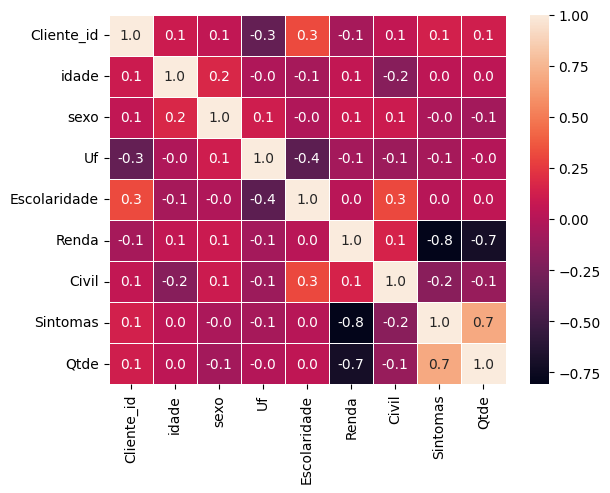

In [ ]:
sns.heatmap(Dados.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)


# **4 - K-Means**

In [ ]:
X = Dados.loc[:,['Renda','Sintomas']]

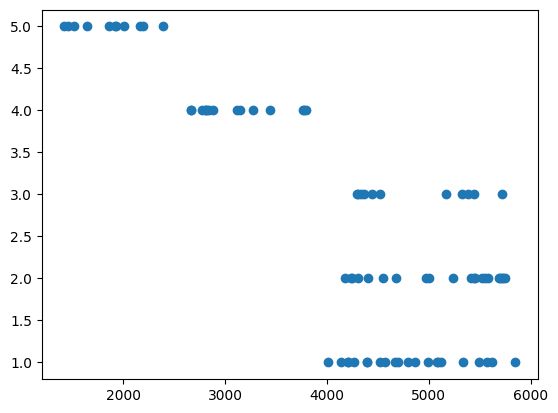

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X['Renda'],X['Sintomas'])
plt.show()